Principal Component Analysis (PCA) is a technique utilized to reduce the dimensionality of huge datasets while preserving important information. The qualities are organized based on the relevance of their variance, which helps to create a representation that is easier to read (Jolliffe, I. T. 2002).  

Therefore, PCA is suitable for dimensionality reduction, as it helps uncover essential knowledge about the relationships between various aspects.

In [67]:
#Importing  necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # PCA library
from sklearn.preprocessing import StandardScaler #for data standardization
import plotly.express as px

# Loading the dataset
task3 = pd.read_csv("energydata_complete.csv")
print("|| task3: " + str(task3.shape) + " ||") 
task3.head()
task3.describe() #to get the summary of the data

|| task3: (19735, 26) ||


Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T8          RH_8            T9          RH_9  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     22.029107     42.936165     19.485828     41.552401   
std    ...      1.956162      5.224361      2.014712      4.151497   
min    ...     16.306667     29.600000     14.890000     29.166667   
25%    ...     20.790000     39.066667     18.000000     38.500000   
50%    ...     22.100000     42.375000     19.390000     40.900000   
75%    ...     23.390000     46.536000     20.600000     44.338095   
max    ...     27.230000     58.780000     24.500000     53.326667   

              T_out   Press_mm_hg        RH_out     Windspeed    Visibility  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.412580    755.522602     79.750418      4.039752     38.330834   
std        5.318464      7.399441     14.901088      2.451221     11.794719   
min       -5.000000    729.300000     24.000000      0.000000      1.000000   
25%        3.670000    750.933333     70.333333      2.000000     29.000000   
50%        6.920000    756.100000     83.666667      3.666667     40.000000   
75%       10.400000    760.933333     91.666667      5.500000     40.000000   
max       26.100000    772.300000    100.000000     14.000000     66.000000   

          Tdewpoint  
count  19735.000000  
mean       3.760995  
std        4.195248  
min       -6.600000  
25%        0.900000  
50%        3.430000  
75%        6.570000  
max       15.500000  

[8 rows x 26 columns]

In [68]:
#Standardize the data to have mean 0 and standard deviation 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(task3) #using fit transform as se


#selecting a minimum number between the sample and feature numbers is advised, as this ensures efficient dimensionality reduction while retaining significant variation.

#Performing pca
pca = PCA(n_components = 3)
principal_components = pca.fit_transform(scaled_data)

In [69]:
principal_components.shape # from 26, the features have been reduced to 3

(19735, 3)

In [70]:
#3D visualisation of the pca
fig = px.scatter_3d(
      principal_components, x=0, y=1, z=2,
      title='3D plot of PCA',
    labels={'0': 'PC 1', '1': 'PC 2', '2':'PC 3'},
)
fig.show()


In [71]:
#in order to analyse the PCA, explained variance ratio is calculated

The explained variance ratio, a key metric in model selection, helps determine the optimal number of components by calculating the percentage of variance each component accounts for (Lindgren, 2020).

In [72]:
total_var = pca.explained_variance_ratio_.sum()*100
print ('Total explained variance with 3 components:', total_var)

Total explained variance with 3 components: 70.24249282354772


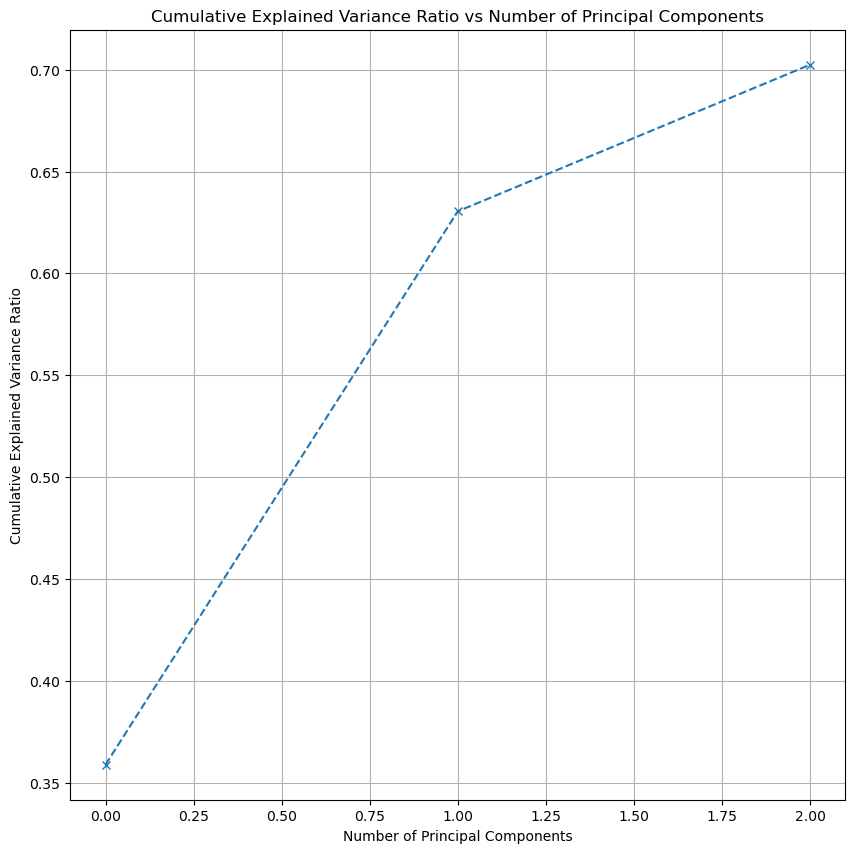

In [73]:
# Plotting the explained variance ratio 
plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='x', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs Number of Principal Components')
plt.grid(True)
plt.show()


In [74]:
#10 components are being used as minimizes dataset dimensionality 

In [75]:
#Standardize the data to have mean 0 and standard deviation 1
scaler2 = StandardScaler()
scaled_data2 = scaler.fit_transform(task3) #using fit transform as se


In [76]:
# Performing PCA with 10 components
pca = PCA(n_components=10)  
principal_components_2 = pca.fit_transform(scaled_data2)
principal_components_2.shape  #checking the data

(19735, 10)

In [77]:
#3D visualisation of the pca with 10 components
fig = px.scatter_3d(
      principal_components, x=0, y=1, z=2,
      title='3D plot of PCA with 10 componets',
    labels={'0': 'PC 1', '1': 'PC 2', '2':'PC 3'},
)
fig.show()


In [78]:
total_var_2 = pca.explained_variance_ratio_.sum()*100
print ('Total explained variance with 10 components:', total_var_2)

Total explained variance with 10 components: 93.50784657975896


# JUSTIFICATION

After applying PCA to assess the dimensionality reduction process, it is clear that the dataset's three-dimensional projection captures 70.42% of the variance which is a significant deviation from the target of 80%. This suggests that the three-dimensional projection might not accurately represent all of the crucial information from the original dataset (Zebari et al., 2020).

To solve this constraint, I ran PCA with ten components, yielding an explained variance ratio of 93.5%. A better representation of the original dataset is produced by capturing a higher percentage of features (Jolliffe, I. T. 2002).

Thus, it is clear from these results  that a three-dimensional projection might not adequately represent the crucial information in the dataset. Alternatively, a more thorough representation of the data is produced when PCA is used with a larger number of components ensuring that important information is kept for additional research.


Jolliffe, I. T. (2002). Principal Component Analysis, Second Edition. Springer.

Lindgren, I. (2020) Dealing with highly dimensional data using principal component analysis (PCA), Medium. Available at: https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6 (Accessed: 30 April 2024). 

Zebari, R. et al. (2020) ‘A comprehensive review of dimensionality reduction techniques for feature selection and feature extraction’, Journal of Applied Science and Technology Trends, 1(1), pp. 56–70. 

WORD COUNT - 236
